In [1]:
import pandas as pd 
from typing import TypedDict, List
from langgraph.graph import StateGraph

/home/mye/lang_project/python14-env/lib/python3.14/site-packages/langchain_core/_api/deprecation.py:26: UserWarning: Core Pydantic V1 functionality isn't compatible with Python 3.14 or greater.
  from pydantic.v1.fields import FieldInfo as FieldInfoV1


In [25]:
class AgentState(TypedDict):
    name: str
    age: int
    final: str
    

In [26]:
def first_node(state: AgentState)->AgentState:
    """this is the firs node of our sequence"""
    state["final"] = f"Hi {state["name"]}!"
    return state 
def second_node(state: AgentState)-> AgentState:
    """This is the scond nod of our sequence"""
    state["final"] = state["final"] + f" You are {state['age']} years old"
    return state

In [28]:
graph = StateGraph(AgentState)
graph.add_node("First Node", first_node)
graph.add_node("Second Node", second_node)
graph.add_edge("First Node", "Second Node")
graph.set_entry_point("First Node")
graph.set_finish_point("Second Node")
app = graph.compile()


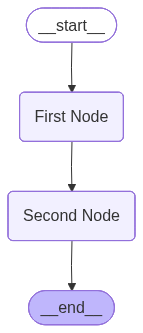

In [29]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [31]:
result = app.invoke({"name": "Charlie", "age": "20"})
print(result["final"])

Hi Charlie! You are 20 years old


In [2]:
class AgentState(TypedDict):
    name: str
    age: int
    skills: List[str]
def first_node_1(state: AgentState)->AgentState:
    """this function greeets"""
    state["name"] = f"Good morning {state['name']}"
    return state
def second_node_2(state: AgentState)->AgentState:
    """This function tell age"""
    state["name"]  = state['name'] + f" I am {state['age']} years old."
    return state 
def third_node_3(state: AgentState)->AgentState:
    """List of all skills """
    state["name"] = state["name"] + " I have these skills " + " ".join(state["skills"])

    return state
    

In [4]:
graph = StateGraph(AgentState)
   # now START exists
graph.add_node("telling", first_node_1)
graph.add_node("age", second_node_2)
graph.add_node("skills", third_node_3)

# Add edges  # entrypoint
graph.add_edge("telling", "age")
graph.add_edge("age", "skills")
graph.set_entry_point("telling")
graph.set_finish_point("skills")

# Compile
app = graph.compile()


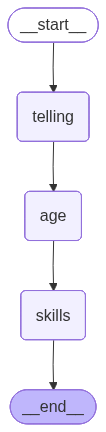

In [5]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [6]:

inputs = {"name": "Mye", "age": 20, "skills": ["Python", "CSS", "Tailwind", "Database"]}
output = app.invoke(inputs)
output["name"]

'Good morning Mye I am 20 years old. I have these skills Python CSS Tailwind Database'